In [54]:
'''Workflow of a data scientist:

    Data Cleaning:
        Handle missing values
        Remove duplicates
        Remove outliers
        Standard formats
    Exploratory Data Analysis:
        Explore data patterns and distributions
        Summary statistics and visualization
    Feature Engineering:
        Selection of most relevant features
        Example: For a table containing weather data (Date | Temperature | Humidity | Wind Speed | Probability Rain (%)), if X = {Temperature (Celsius)=41, Humidity (%)=30, Wind Speed=20}, then y = f(X). ML/AI/DL estimates a function f that maps X into y by designing an ML algorithm like an Artificial Neural Network.
        Reduce dimensionality
    Data Transformation:
        Normalization, Encoding categorical data
        Example: f(X) T+H+WS 25+70+5= 100 where T=25, H=70, W=5
    Data Splitting: Train Test Validation (80-10-10)
        Trainset: Used for estimation of the function that is being learned from the data.
        Testset: Used for performance of the ML algorithm.
        Validationset: Used for monitoring the performance of the Machine Learning (ML) algorithm during training and may be providing some modification during training to improve the performance or control the training.
Testset and Valset: These sets are unseen to the ML algorithm / ANN (Artificial Neural Network).
Data Split: The split of data into Train, Test, and Validation sets should be unbiased, fair, and representative in all these splits. '''


'Workflow of a data scientist:\n\n    Data Cleaning:\n        Handle missing values\n        Remove duplicates\n        Remove outliers\n        Standard formats\n    Exploratory Data Analysis:\n        Explore data patterns and distributions\n        Summary statistics and visualization\n    Feature Engineering:\n        Selection of most relevant features\n        Example: For a table containing weather data (Date | Temperature | Humidity | Wind Speed | Probability Rain (%)), if X = {Temperature (Celsius)=41, Humidity (%)=30, Wind Speed=20}, then y = f(X). ML/AI/DL estimates a function f that maps X into y by designing an ML algorithm like an Artificial Neural Network.\n        Reduce dimensionality\n    Data Transformation:\n        Normalization, Encoding categorical data\n        Example: f(X) T+H+WS 25+70+5= 100 where T=25, H=70, W=5\n    Data Splitting: Train Test Validation (80-10-10)\n        Trainset: Used for estimation of the function that is being learned from the data.\n 

In [55]:
import pandas as pd 
import os 


In [56]:
root_dir= r"C:\Users\User\Downloads"
data_dir=os.path.join(root_dir,"60 days of python")
dataset_path=os.path.join(data_dir,"health_monitor_data.csv")
print(dataset_path)

C:\Users\User\Downloads\60 days of python\health_monitor_data.csv


# **Load Data**

In [57]:
health_monitor_data=pd.read_csv(dataset_path)
health_monitor_data.head()

,Duration,Date,Pulse,Maxpulse,Calories,Type
0,60,'2020/12/01',110,130,409.1,Easy
1,60,'2020/12/02',117,145,479.0,Moderate
2,60,'2020/12/03',103,135,340.0,Moderate
3,45,'2020/12/04',109,175,282.4,Moderate
4,45,'2020/12/05',117,148,406.0,Heavy


# **Data cleaning**

In [58]:
health_monitor_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  33 non-null     int64  
 1   Date      32 non-null     object 
 2   Pulse     33 non-null     int64  
 3   Maxpulse  33 non-null     int64  
 4   Calories  31 non-null     float64
 5   Type      33 non-null     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ KB


**Handle missing**

In [59]:
"""
Approach 1: Remove rows (When the dataset is large enough)
Approach 2: Impute(replace with something) missing values (When the dataset is small) 
"""
mask=health_monitor_data.isnull()
print(mask)


    Duration   Date  Pulse  Maxpulse  Calories   Type
0      False  False  False     False     False  False
1      False  False  False     False     False  False
2      False  False  False     False     False  False
3      False  False  False     False     False  False
4      False  False  False     False     False  False
5      False  False  False     False     False  False
6      False  False  False     False     False  False
7      False  False  False     False     False  False
8      False  False  False     False     False  False
9      False  False  False     False     False  False
10     False  False  False     False     False  False
11     False  False  False     False     False  False
12     False  False  False     False     False  False
13     False  False  False     False     False  False
14     False  False  False     False     False  False
15     False  False  False     False     False  False
16     False  False  False     False     False  False
17     False  False  False  

In [60]:
health_monitor_data.isnull().sum()

Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    2
Type        0
dtype: int64

In [61]:
mask1=health_monitor_data.isnull().any(axis=1)
print(mask1)


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22     True
23    False
24    False
25    False
26    False
27    False
28     True
29    False
30    False
31    False
32    False
dtype: bool


In [62]:
health_monitor_data[mask1]

,Duration,Date,Pulse,Maxpulse,Calories,Type
18,45,'2020/12/18',90,112,NaN,Moderate
22,45,NaN,100,119,282.0,Moderate
28,60,'2020/12/28',103,132,NaN,Heavy


In [63]:
average_val=health_monitor_data['Calories'].mean()
print('average calories={}',format(average_val))

average calories={} 302.93870967741935


In [64]:
health_monitor_data['Calories']=health_monitor_data['Calories'].fillna(value=average_val)
health_monitor_data

,Duration,Date,Pulse,Maxpulse,Calories,Type
0,60,'2020/12/01',110,130,409.10000,Easy
1,60,'2020/12/02',117,145,479.00000,Moderate
2,60,'2020/12/03',103,135,340.00000,Moderate
3,45,'2020/12/04',109,175,282.40000,Moderate
4,45,'2020/12/05',117,148,406.00000,Heavy
5,60,'2020/12/06',102,127,300.00000,Easy
6,60,'2020/12/07',110,136,374.00000,Moderate
7,450,'2020/12/08',104,134,253.30000,Moderate
8,30,'2020/12/09',109,133,195.10000,Heavy
9,60,'2020/12/10',98,124,269.00000,Moderate


In [65]:
mask1=health_monitor_data.isnull().any(axis=1)
health_monitor_data[mask1]


,Duration,Date,Pulse,Maxpulse,Calories,Type
22,45,NaN,100,119,282.0,Moderate


In [66]:
health_monitor_data=health_monitor_data.dropna()
health_monitor_data.isnull().sum()

Duration    0
Date        0
Pulse       0
Maxpulse    0
Calories    0
Type        0
dtype: int64

**Remove Duplicate**

In [67]:
mark2 =health_monitor_data.duplicated()
mark2

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32     True
dtype: bool

In [68]:
health_monitor_data[mark2]

,Duration,Date,Pulse,Maxpulse,Calories,Type
32,60,'2020/12/12',100,120,250.7,Heavy


In [69]:
health_monitor_data=health_monitor_data.drop_duplicates()
health_monitor_data.duplicated().sum()

0

**Convert datatypes**

In [70]:
health_monitor_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 0 to 31
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  31 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     31 non-null     int64  
 3   Maxpulse  31 non-null     int64  
 4   Calories  31 non-null     float64
 5   Type      31 non-null     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.7+ KB


In [71]:
health_monitor_data["Date"]=health_monitor_data['Date'].astype('datetime64[ns]')
health_monitor_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 0 to 31
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Duration  31 non-null     int64         
 1   Date      31 non-null     datetime64[ns]
 2   Pulse     31 non-null     int64         
 3   Maxpulse  31 non-null     int64         
 4   Calories  31 non-null     float64       
 5   Type      31 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.7+ KB


**Remove Outliers Using Interquartile Range(IQR)**

In [72]:
'''
IQR=Q3-Q1(IQR basically means a range beyond which all values are considered as outliers)
L=Q1-1.5*IQR
Rl=Q3+1.5*IQR
'''
Q1=health_monitor_data['Pulse'].quantile(0.25)
print(Q1)
Q3=health_monitor_data['Pulse'].quantile(0.75)
print(Q3)
IQR=Q3-Q1
L=Q1-1.5*IQR
R=Q3+1.5*IQR
print(L,R)


100.0
107.0
89.5 117.5


In [73]:
non_outlier_mask=health_monitor_data['Pulse'].between(L,R)
outlier_mask=~non_outlier_mask
print(outlier_mask)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
23     True
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
Name: Pulse, dtype: bool


In [74]:
health_monitor_data[outlier_mask]

,Duration,Date,Pulse,Maxpulse,Calories,Type
23,60,2020-12-23,130,101,300.0,Heavy


In [75]:
'''removing non-outlier mask'''
health_monitor_data=health_monitor_data[non_outlier_mask]
health_monitor_data.head()

,Duration,Date,Pulse,Maxpulse,Calories,Type
0,60,2020-12-01,110,130,409.1,Easy
1,60,2020-12-02,117,145,479.0,Moderate
2,60,2020-12-03,103,135,340.0,Moderate
3,45,2020-12-04,109,175,282.4,Moderate
4,45,2020-12-05,117,148,406.0,Heavy


# **Exploratory Data Analysis**

<Axes: xlabel='Date'>

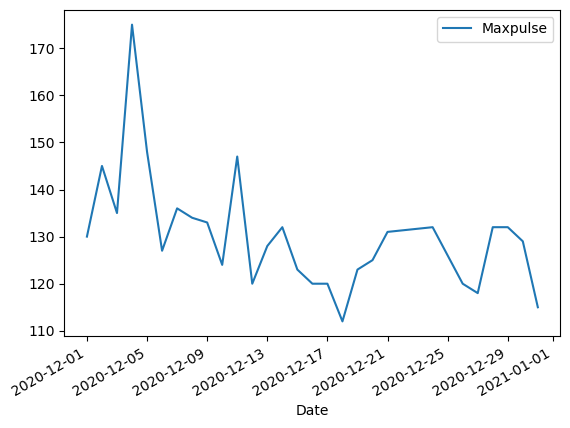

In [76]:
health_monitor_data.plot(
    kind='line',
    x='Date',
    y='Maxpulse'
)

# **Feature Engineering**

In [77]:
'''Select the most relevant features by experience or applying feature selection methods '''

health_monitor_data['Type'].value_counts()

Type
Moderate    14
Heavy       12
Easy         4
Name: count, dtype: int64

**One hot encoding**

In [78]:
'''
category='Type'
Value=Moderate,Heavy,easy
Moderate=[1,0,0]
heavy=[0,1,0]
Easy=[0,0,1]
'''
health_monitor_data_one_hot_encoded=pd.get_dummies(
    health_monitor_data,
    columns=["Type"],
    sparse=True
)
health_monitor_data_one_hot_encoded.head()

,Duration,Date,Pulse,Maxpulse,Calories,Type_Easy,Type_Heavy,Type_Moderate
0,60,2020-12-01,110,130,409.1,True,False,False
1,60,2020-12-02,117,145,479.0,False,False,True
2,60,2020-12-03,103,135,340.0,False,False,True
3,45,2020-12-04,109,175,282.4,False,False,True
4,45,2020-12-05,117,148,406.0,False,True,False


In [79]:
health_monitor_data['label_encoded_type']=pd.Categorical(
    health_monitor_data['Type'],
    categories=['Easy','Moderate','Heavy'],
    ordered=True
).codes
health_monitor_data.head()


,Duration,Date,Pulse,Maxpulse,Calories,Type,label_encoded_type
0,60,2020-12-01,110,130,409.1,Easy,0
1,60,2020-12-02,117,145,479.0,Moderate,1
2,60,2020-12-03,103,135,340.0,Moderate,1
3,45,2020-12-04,109,175,282.4,Moderate,1
4,45,2020-12-05,117,148,406.0,Heavy,2


In [80]:
"""Data can numeric or categorical
2
5 Numeric: We need to normalize out data
4 Categorical: We need to encode categorical data
"""
def normalize(col):
    mean = col.mean()
    std =col.std()
    return ((col-mean) / std)
health_monitor_data['Pulse'] = health_monitor_data['Pulse'].agg(normalize)
health_monitor_data["Maxpulse"] = health_monitor_data["Maxpulse"].agg(normalize)
health_monitor_data['Duration'] = health_monitor_data['Duration'].agg(normalize)
health_monitor_data['Calories'] = health_monitor_data['Calories'].agg(normalize)

health_monitor_data.head()

,Duration,Date,Pulse,Maxpulse,Calories,Type,label_encoded_type
0,-0.131472,2020-12-01,1.144105,0.021784,1.573396,Easy,0
1,-0.131472,2020-12-02,2.246225,1.247111,2.634735,Moderate,1
2,-0.131472,2020-12-03,0.041986,0.430226,0.524203,Moderate,1
3,-0.339060,2020-12-04,0.986660,3.697765,-0.350377,Moderate,1
4,-0.339060,2020-12-05,2.246225,1.492176,1.526326,Heavy,2
